# Linear and polynomial regression examples:

For the same data, we will estimate a linear model, and a polynomial model :

### Expected linear model (obtained from Excel):

$y = -0,052x + 62,561$

### Expected Polynomial with degree 2 model (obtained also from Excel):

$y = 0,0214 x^2 - 2,1948 x + 96,306$


## Python Code :


Import python moodules :


In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Load the data file (directly with loadtxt or using pandas) :


In [116]:
df = pd.read_csv(
    "../../data/linear-regression-example-data.csv", decimal=",", delimiter=";"
)

Print your data


In [117]:
df.head(5)

,X,Y
0,84.3590,59.8077
1,72.8205,52.5000
2,96.4103,49.4231
3,7.1795,90.1923
4,10.2564,80.9615


Print the data shape


In [118]:
df.shape

(150, 2)

Prepare your inputs and outputs


In [119]:
X = df["X"]
Y = df["Y"]

Visualize the data in a scatter plot


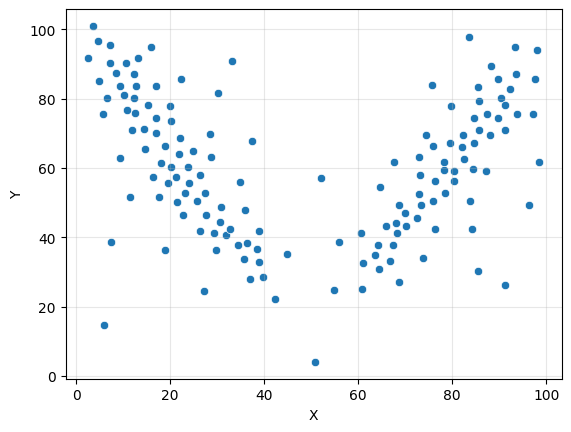

In [120]:
sns.scatterplot(data=df, x="X", y="Y")
plt.grid(True, alpha=0.3)
plt.show()

Instanciate the linear model


In [121]:
model = LinearRegression()

Convert X from 1D to 2D :


In [122]:
X = X.values.reshape(-1, 1)

Training (fitting) the model using our data


In [123]:
model.fit(X, Y)

LinearRegression()

Print the coefficient and the intercept of your regression


In [124]:
print("Coefficient: ", model.coef_[0])
print("Intercept: ", model.intercept_)

Coefficient:  -0.0520396561505794
Intercept:  62.5612467676423


Calculate the prediction values of your input data


In [125]:
predictions = model.predict(X)

Visualize in predicted values and output values in the same plot


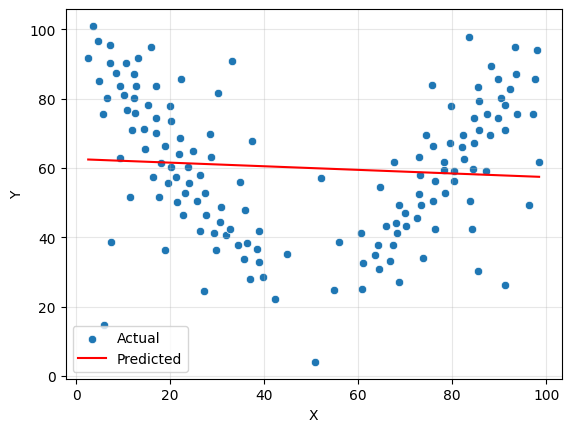

In [126]:
sns.scatterplot(data=df, x="X", y="Y", label="Actual")
sns.lineplot(x=X.flatten(), y=predictions, color="red", label="Predicted")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Polynomial model


Train a polynomial model (2nd degree) over your data


In [127]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()

poly_model.fit(X_poly, Y)

LinearRegression()

Predict the new corresponding value for yout inputs


In [128]:
poly_predictions = poly_model.predict(X_poly)

Visualize the predicted values and your output in the same plot


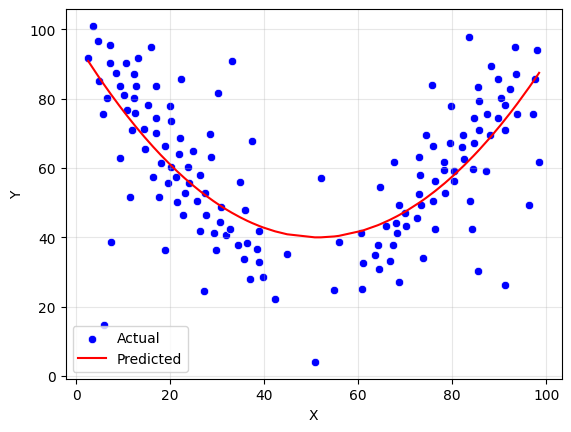

In [129]:
sns.scatterplot(data=df, x="X", y="Y", color="blue", label="Actual")
sns.lineplot(x=X.flatten(), y=poly_predictions, color="red", label="Predicted")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Display the coefficients of your polynom


In [130]:
print("Polynomial Coefficients: ", poly_model.coef_)
print("Polynomial Intercept: ", poly_model.intercept_)

Polynomial Coefficients:  [ 0.         -2.19483     0.02137486]
Polynomial Intercept:  96.30644178229142


# Exercice :

Split the data into two groups (X<50 and X>=50) and apply a linear regression for each group.


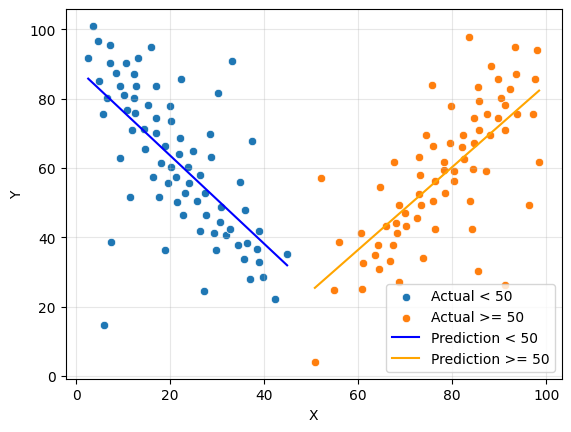

In [131]:
grp1 = df[X.flatten() < 50]
grp2 = df[X.flatten() >= 50]

X_grp1 = grp1["X"].values.reshape(-1, 1)
X_grp2 = grp2["X"].values.reshape(-1, 1)

model1 = LinearRegression()
model2 = LinearRegression()

model1.fit(X_grp1, grp1["Y"])
model2.fit(X_grp2, grp2["Y"])

predictions1 = model1.predict(X_grp1)
predictions2 = model2.predict(X_grp2)

sns.scatterplot(data=grp1, x="X", y="Y", label="Actual < 50")
sns.scatterplot(data=grp2, x="X", y="Y", label="Actual >= 50")
sns.lineplot(x=grp1["X"], y=predictions1, color="blue", label="Prediction < 50")
sns.lineplot(x=grp2["X"], y=predictions2, color="orange", label="Prediction >= 50")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()